In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import anndata as ad
import scanpy as sc
import pandas as pd
import squidpy as sq

In [2]:
in_dir = "../../results/10_stereo_seq/01_process"
out_dir = "../../results/10_stereo_seq/10_neighbor_enrichment"

os.makedirs(out_dir, exist_ok=True)

In [3]:
df = pd.read_csv("../../results/10_stereo_seq/07_integrate_with_scrna/spatial.csv", index_col=0)
df = df[["sample", "cell_type"]]

In [4]:
for sample in ["HC01", "HL05", "HL25", "HL35"]:
    adata = sc.read_h5ad(f'{in_dir}/{sample}.h5ad')
    df_sub = df[df["sample"] == sample]
    adata.obs = adata.obs.join(df_sub)
    
    adata.write_h5ad(f"{out_dir}/{sample}.h5ad")

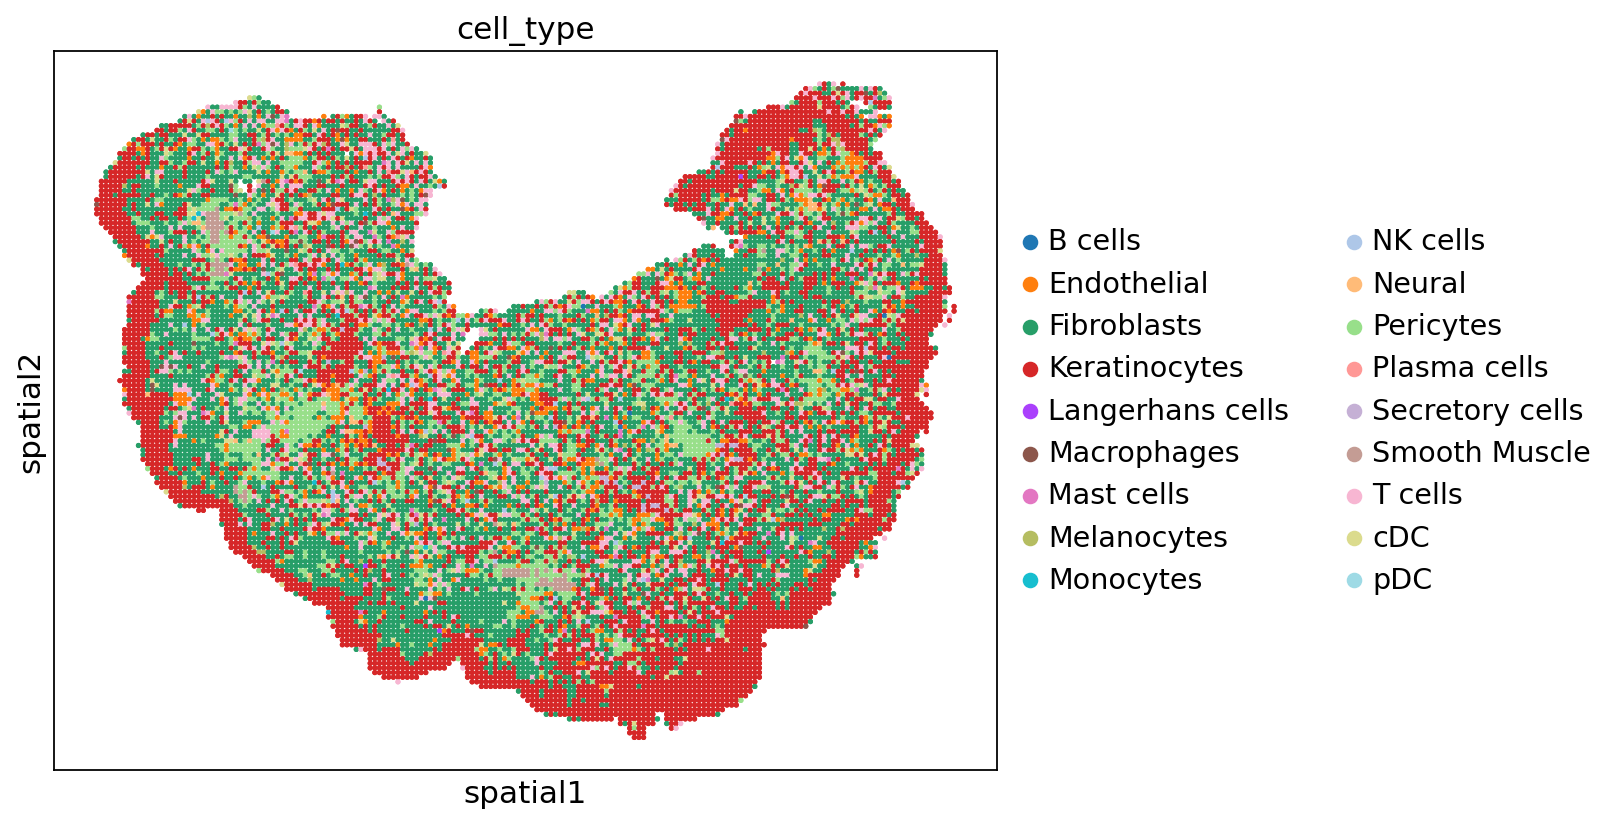

In [19]:
sc.set_figure_params(figsize=(10, 10))

adata = sc.read_h5ad(f"{out_dir}/HC01.h5ad")
sq.pl.spatial_scatter(adata, color="cell_type", shape=None)

In [20]:
adata.obsm["spatial"]

array([[10350,  4550],
       [10350,  4600],
       [10350,  4650],
       ...,
       [19550,  5850],
       [19600,  5700],
       [19600,  5750]], dtype=uint32)

  0%|          | 0/1000 [00:00<?, ?/s]

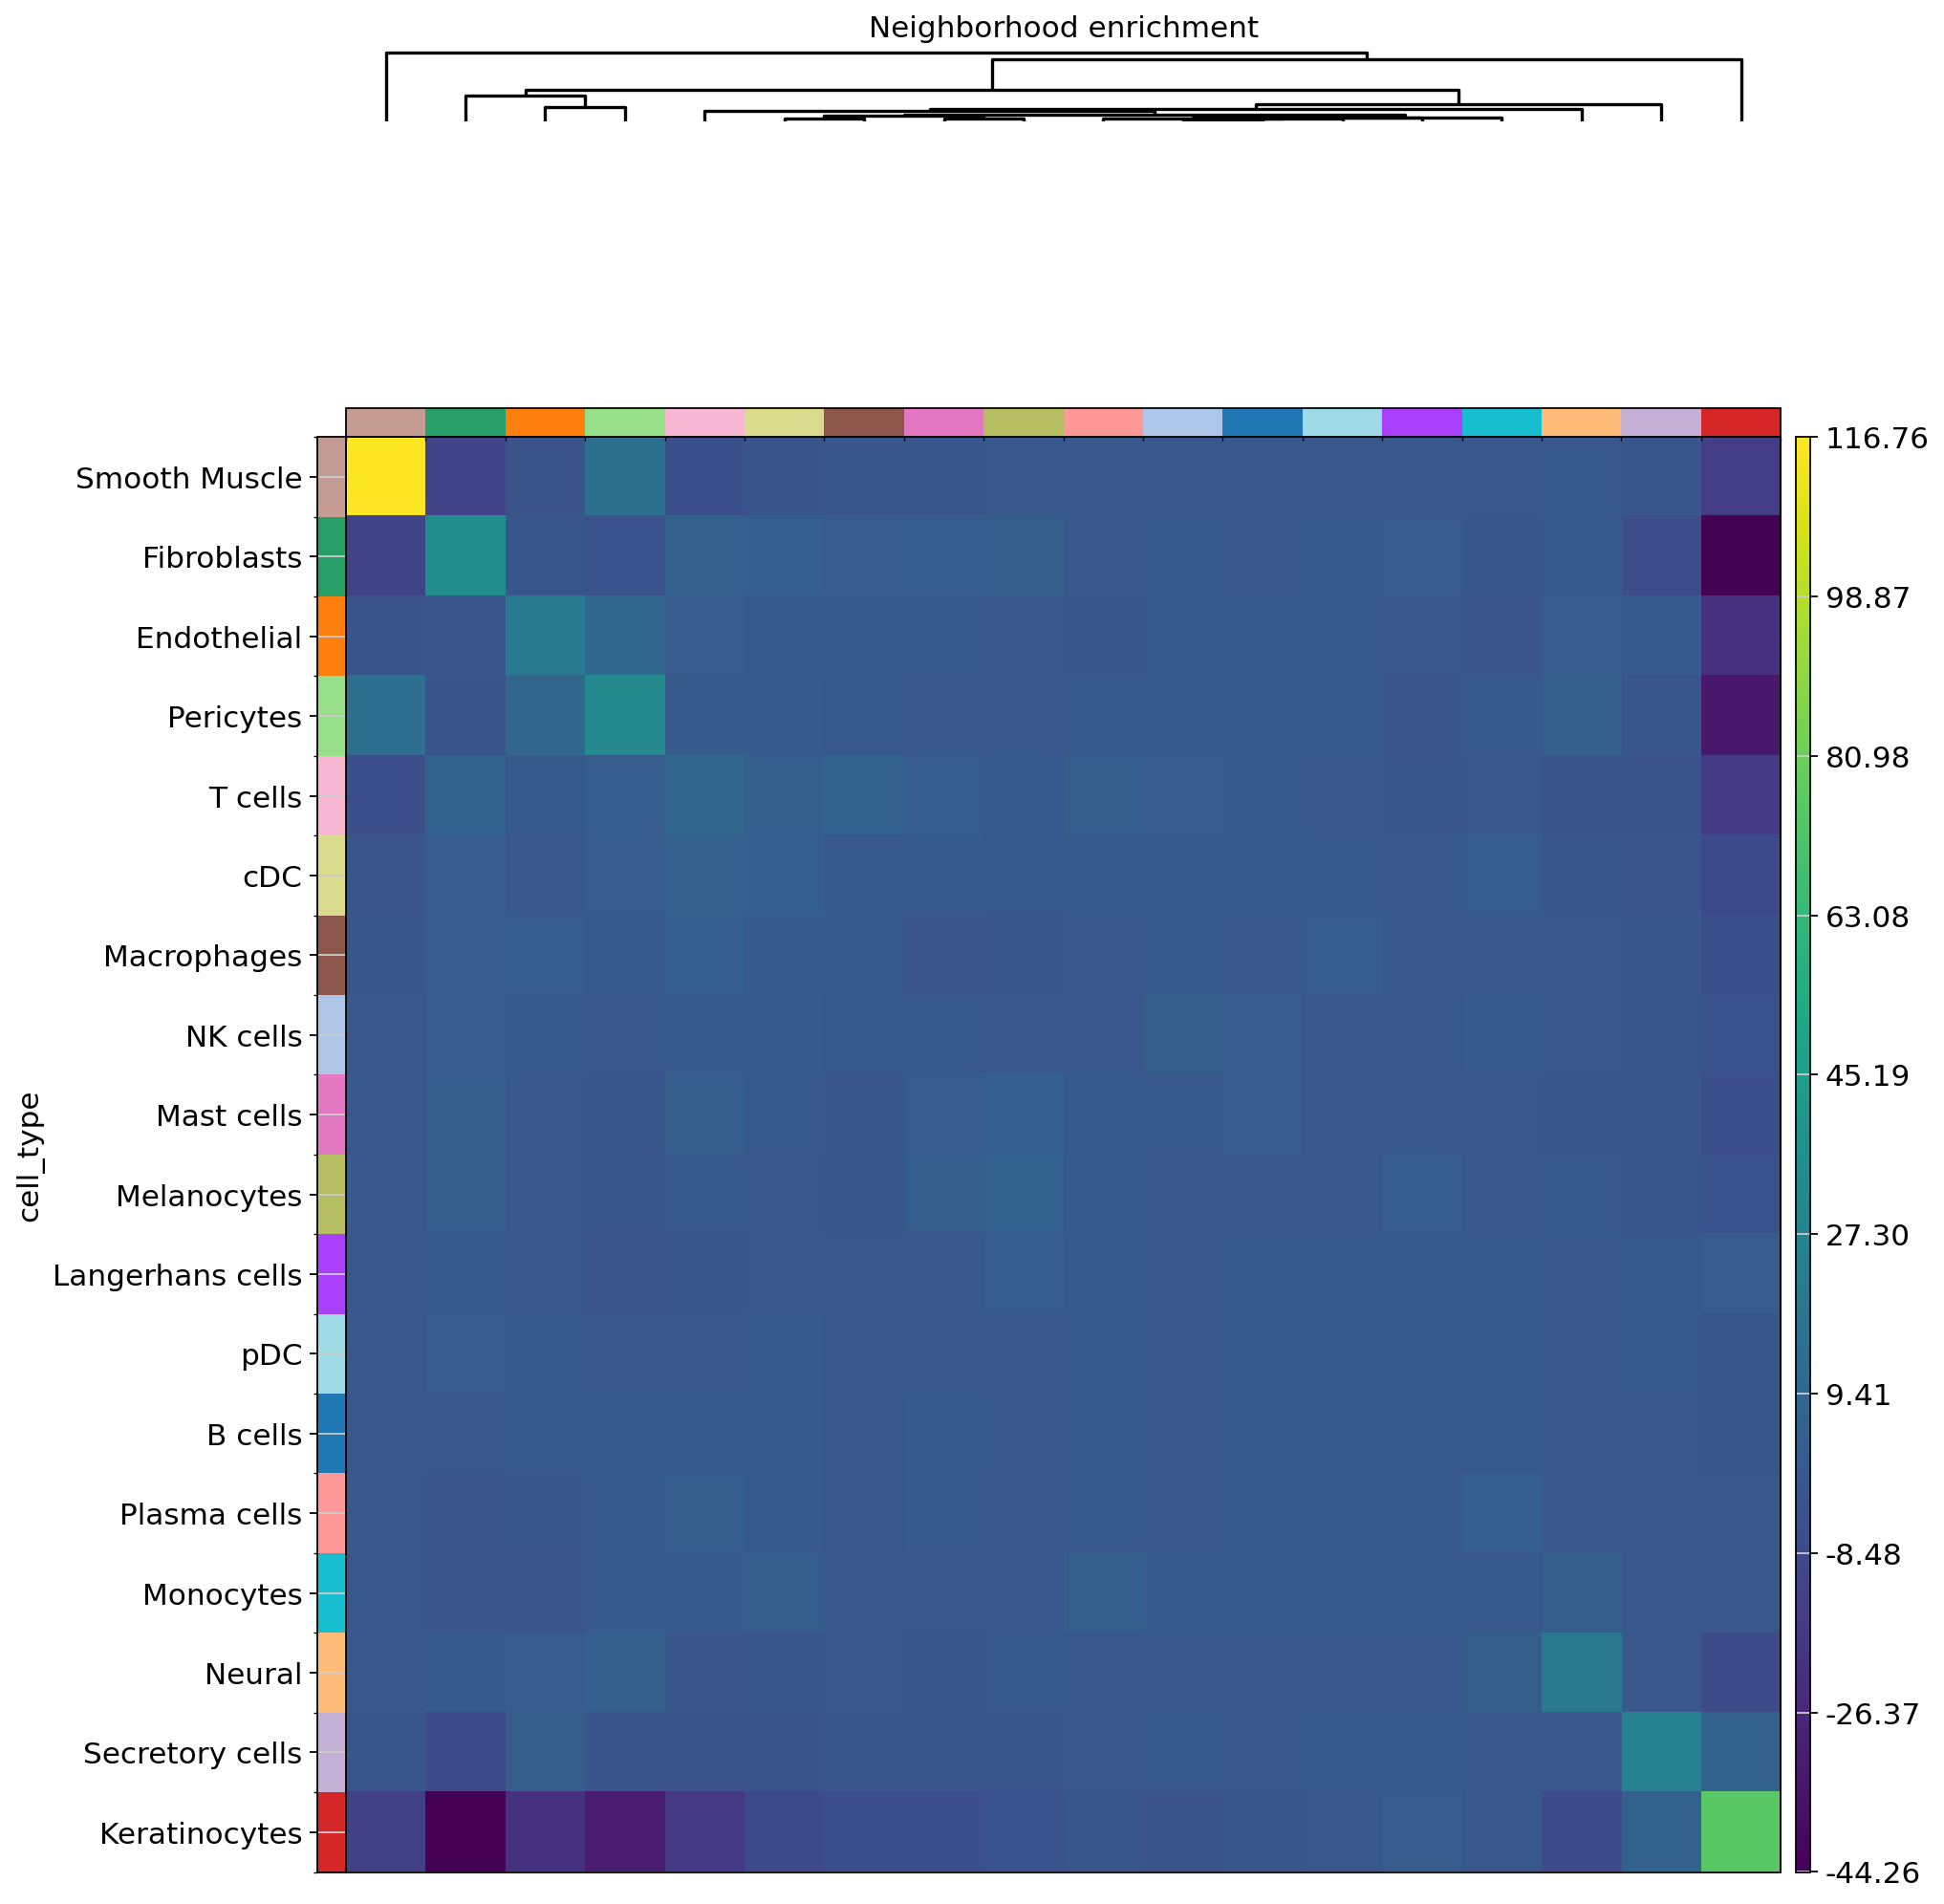

In [6]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="cell_type")
sq.pl.nhood_enrichment(adata, cluster_key="cell_type", method="ward")

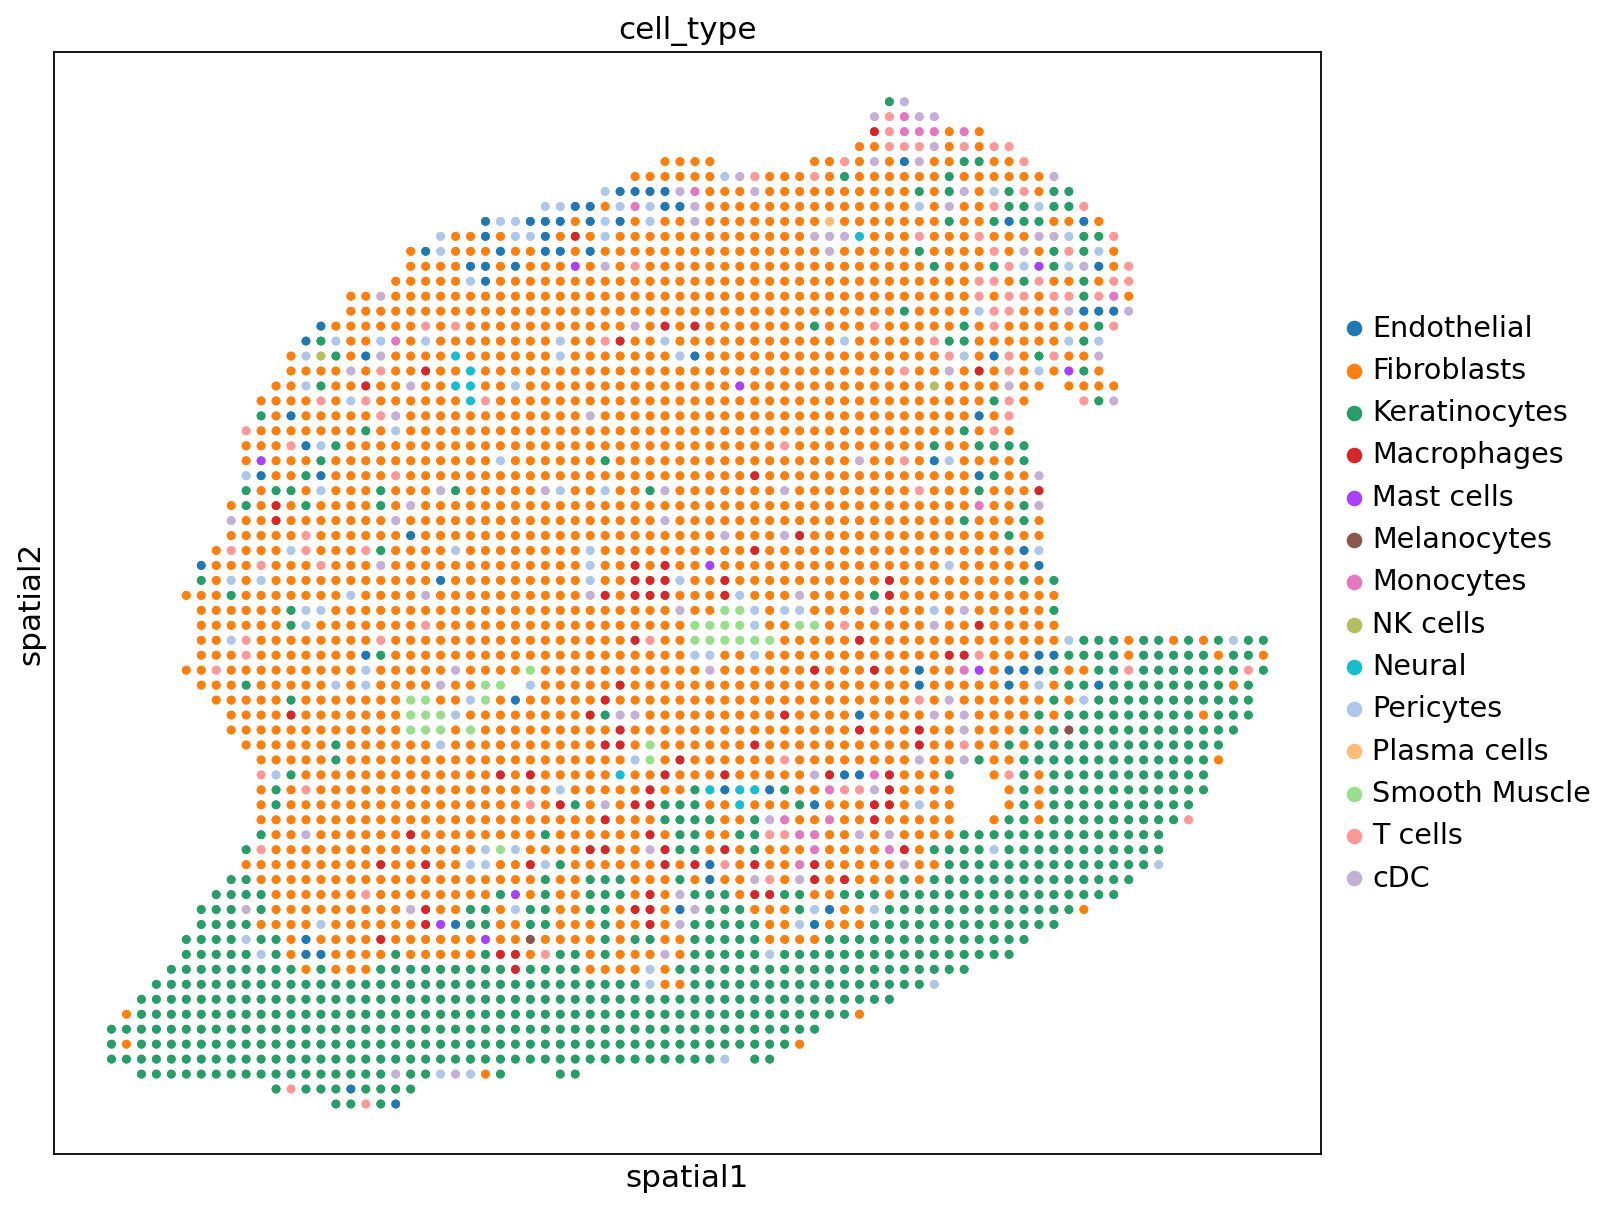

In [21]:
adata = sc.read_h5ad(f"{out_dir}/HL05.h5ad")
sq.pl.spatial_scatter(adata, color="cell_type", shape=None)

In [22]:
adata.obsm["spatial"]

array([[3700, 8100],
       [3700, 8150],
       [3700, 8200],
       ...,
       [7550, 6800],
       [7550, 6850],
       [7550, 6900]], dtype=uint32)

  0%|          | 0/1000 [00:00<?, ?/s]

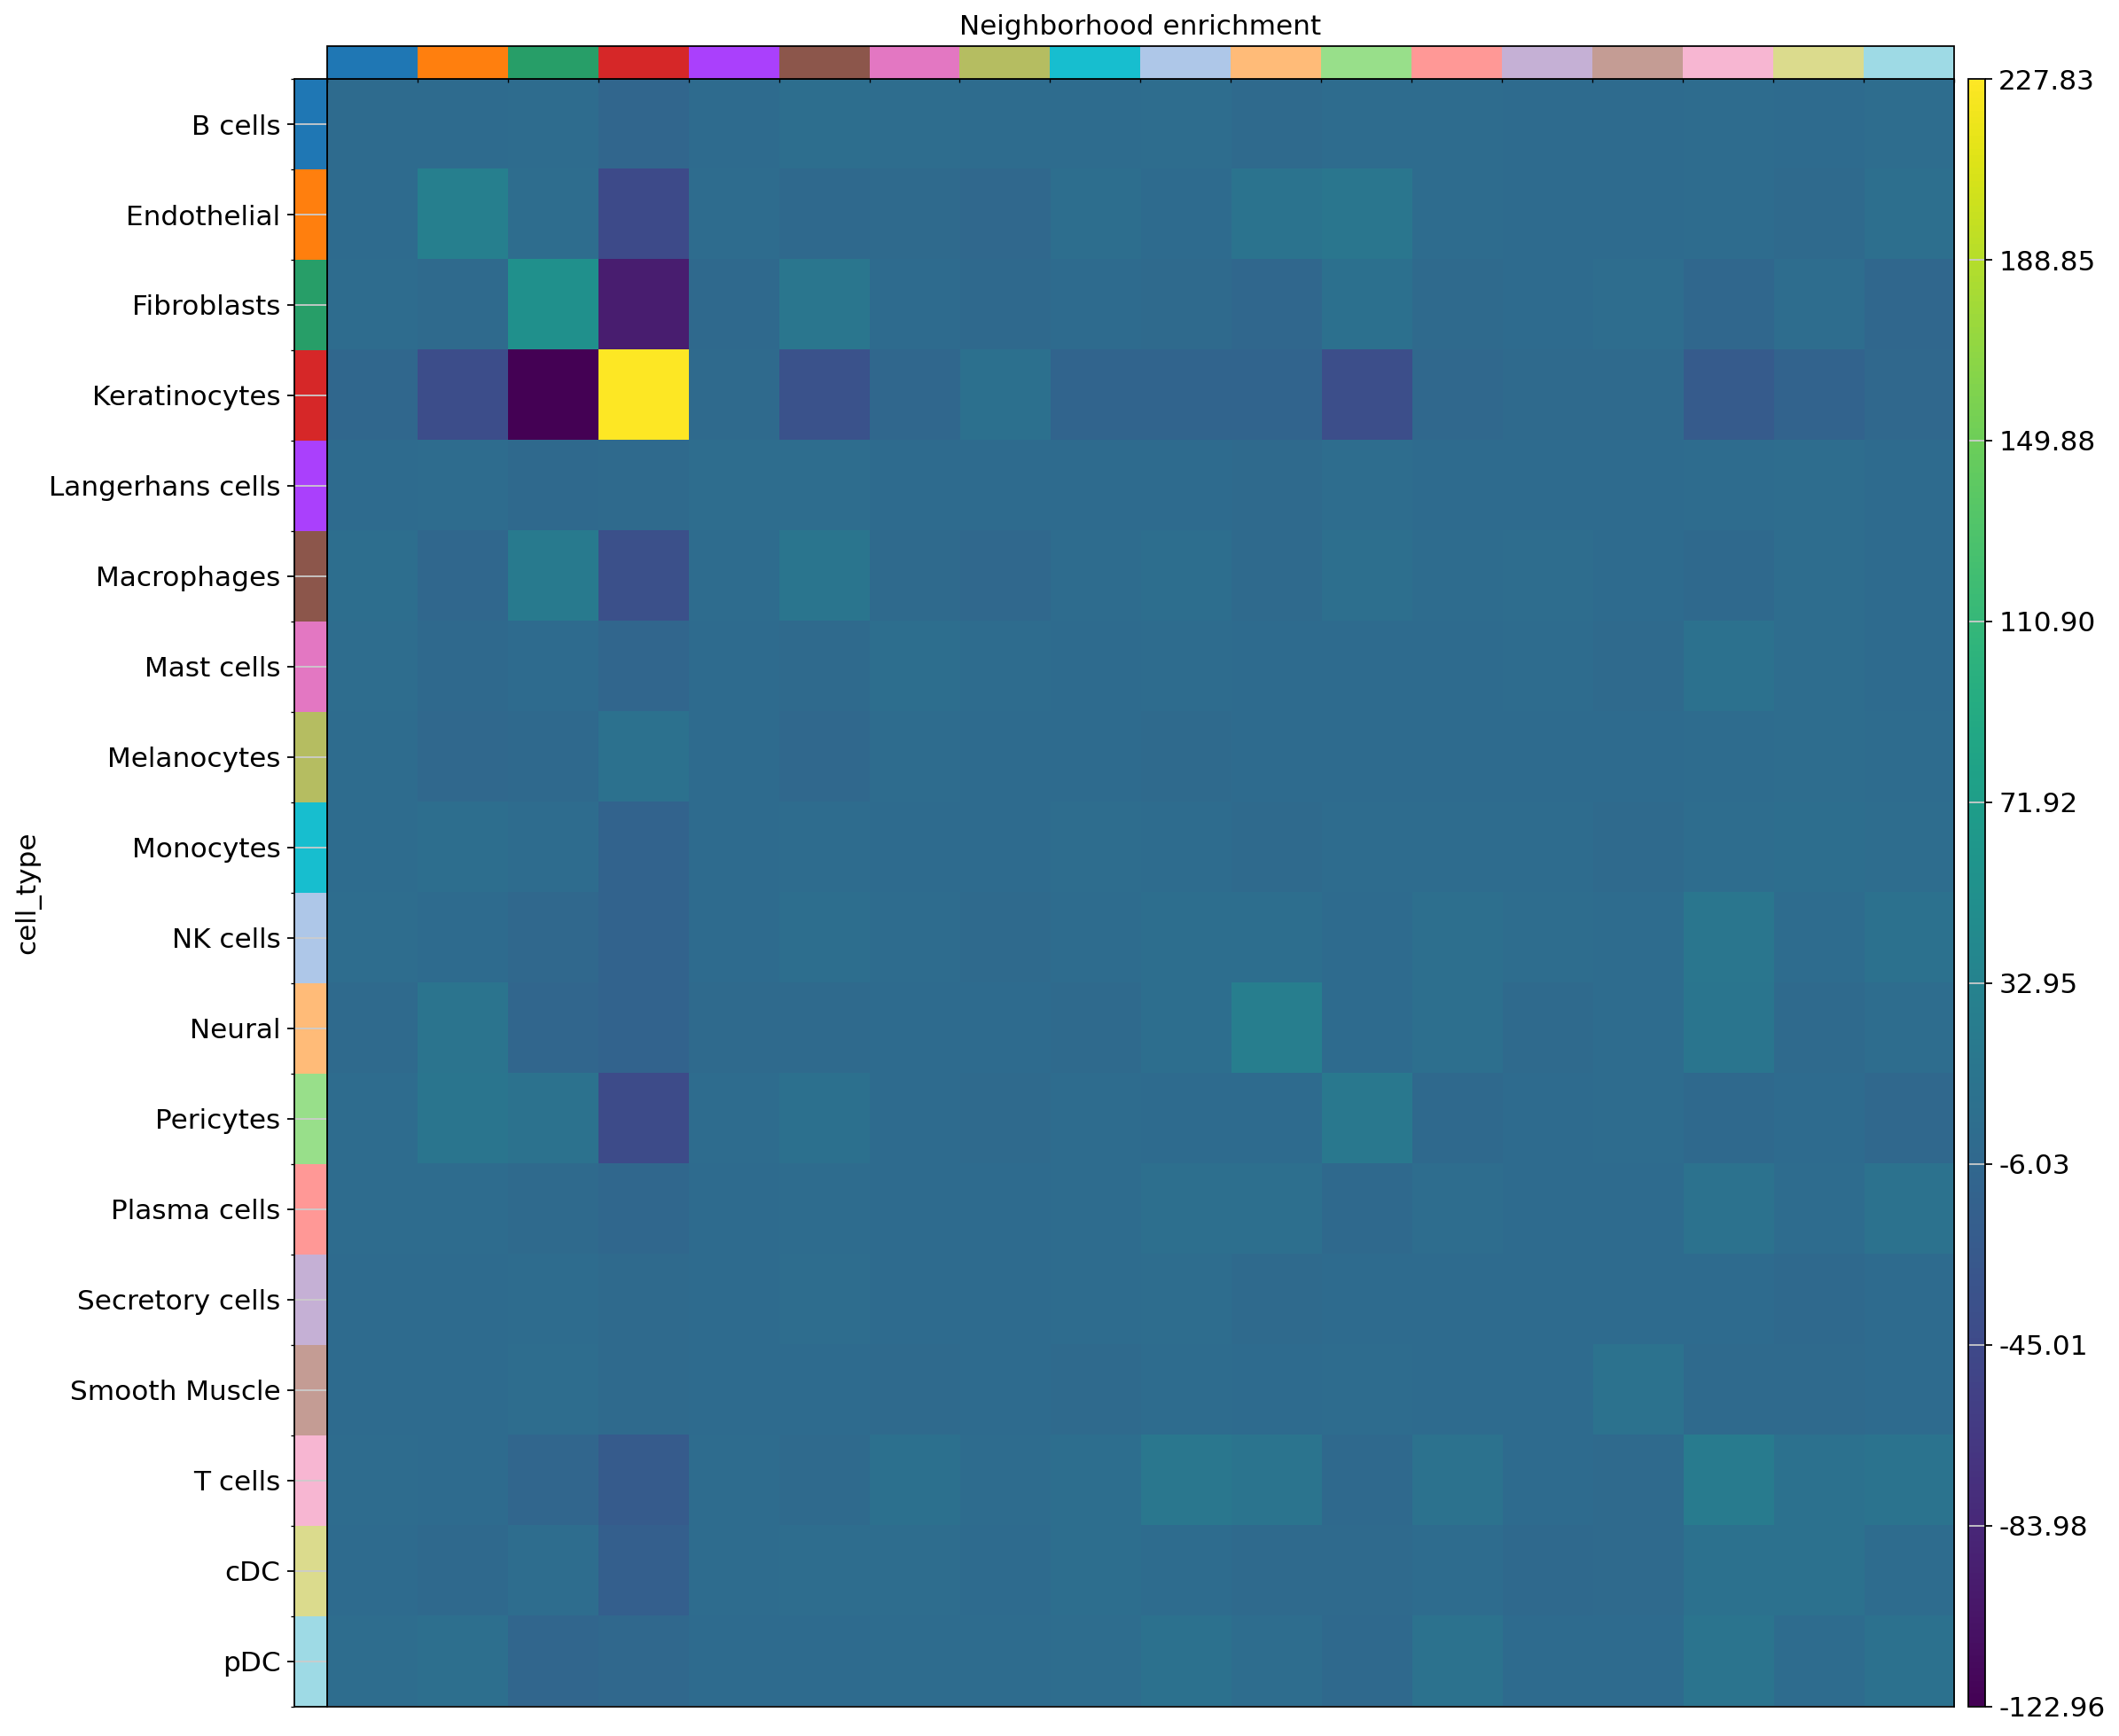

In [16]:
sq.gr.spatial_neighbors(adata, n_neighs=100, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="cell_type")
sq.pl.nhood_enrichment(adata, cluster_key="cell_type")

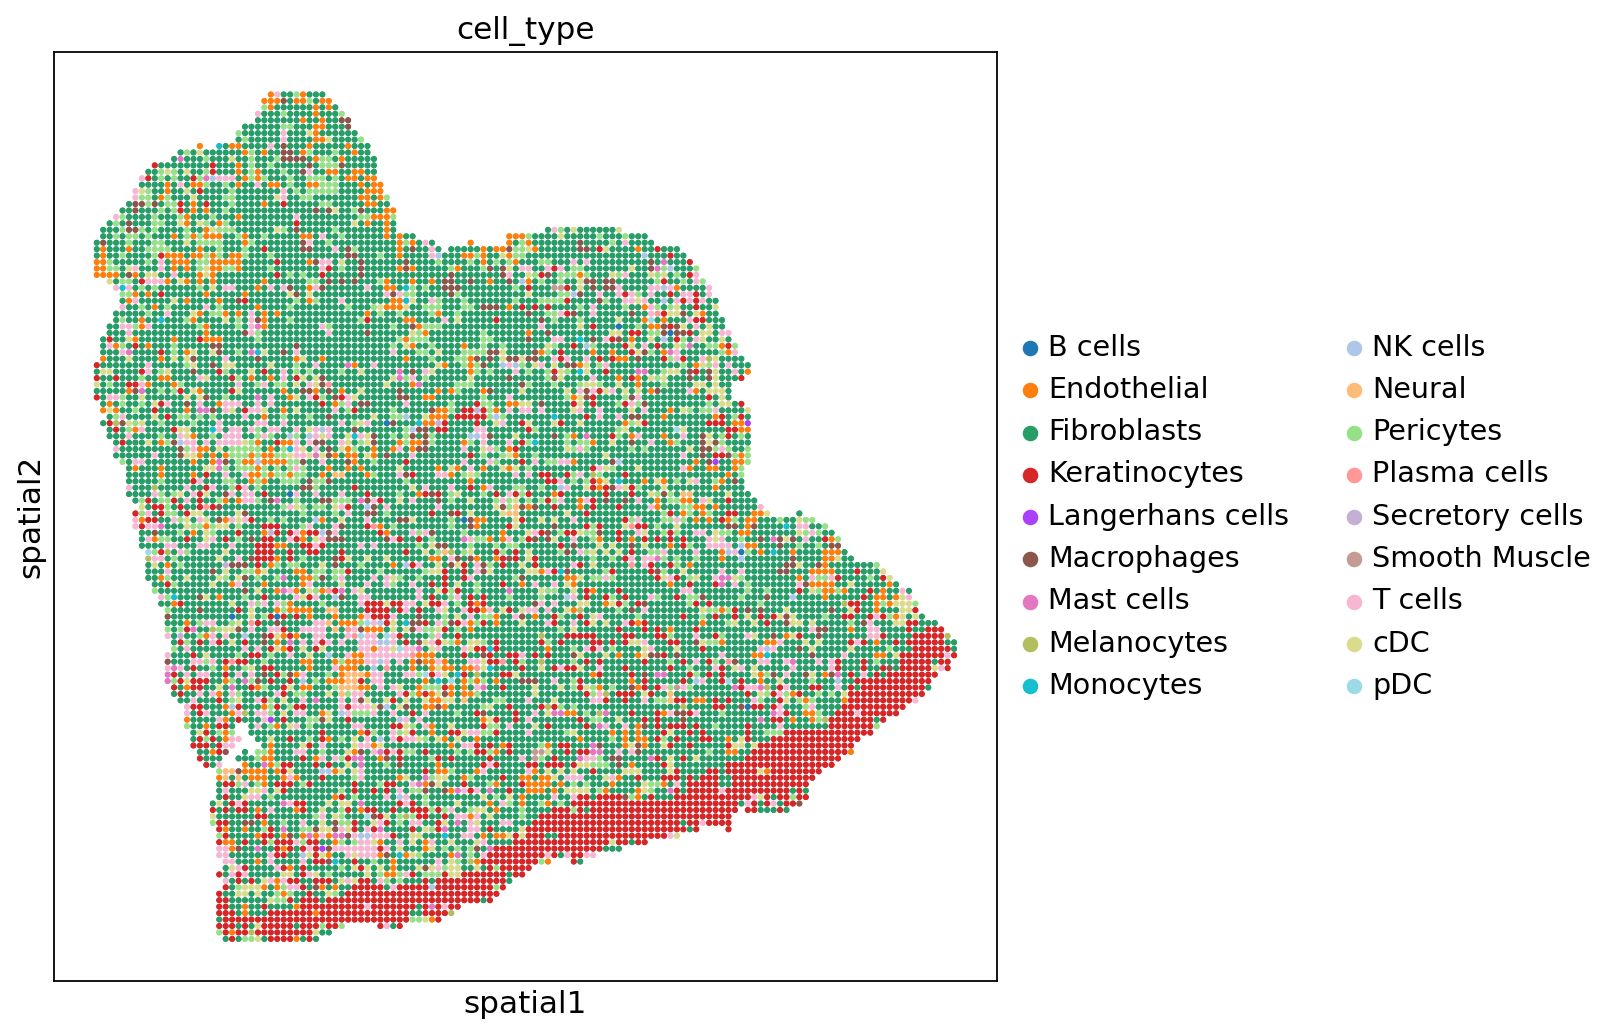

In [13]:
adata = sc.read_h5ad(f"{out_dir}/HL25.h5ad")
sq.pl.spatial_scatter(adata, color="cell_type", shape=None)

  0%|          | 0/1000 [00:00<?, ?/s]

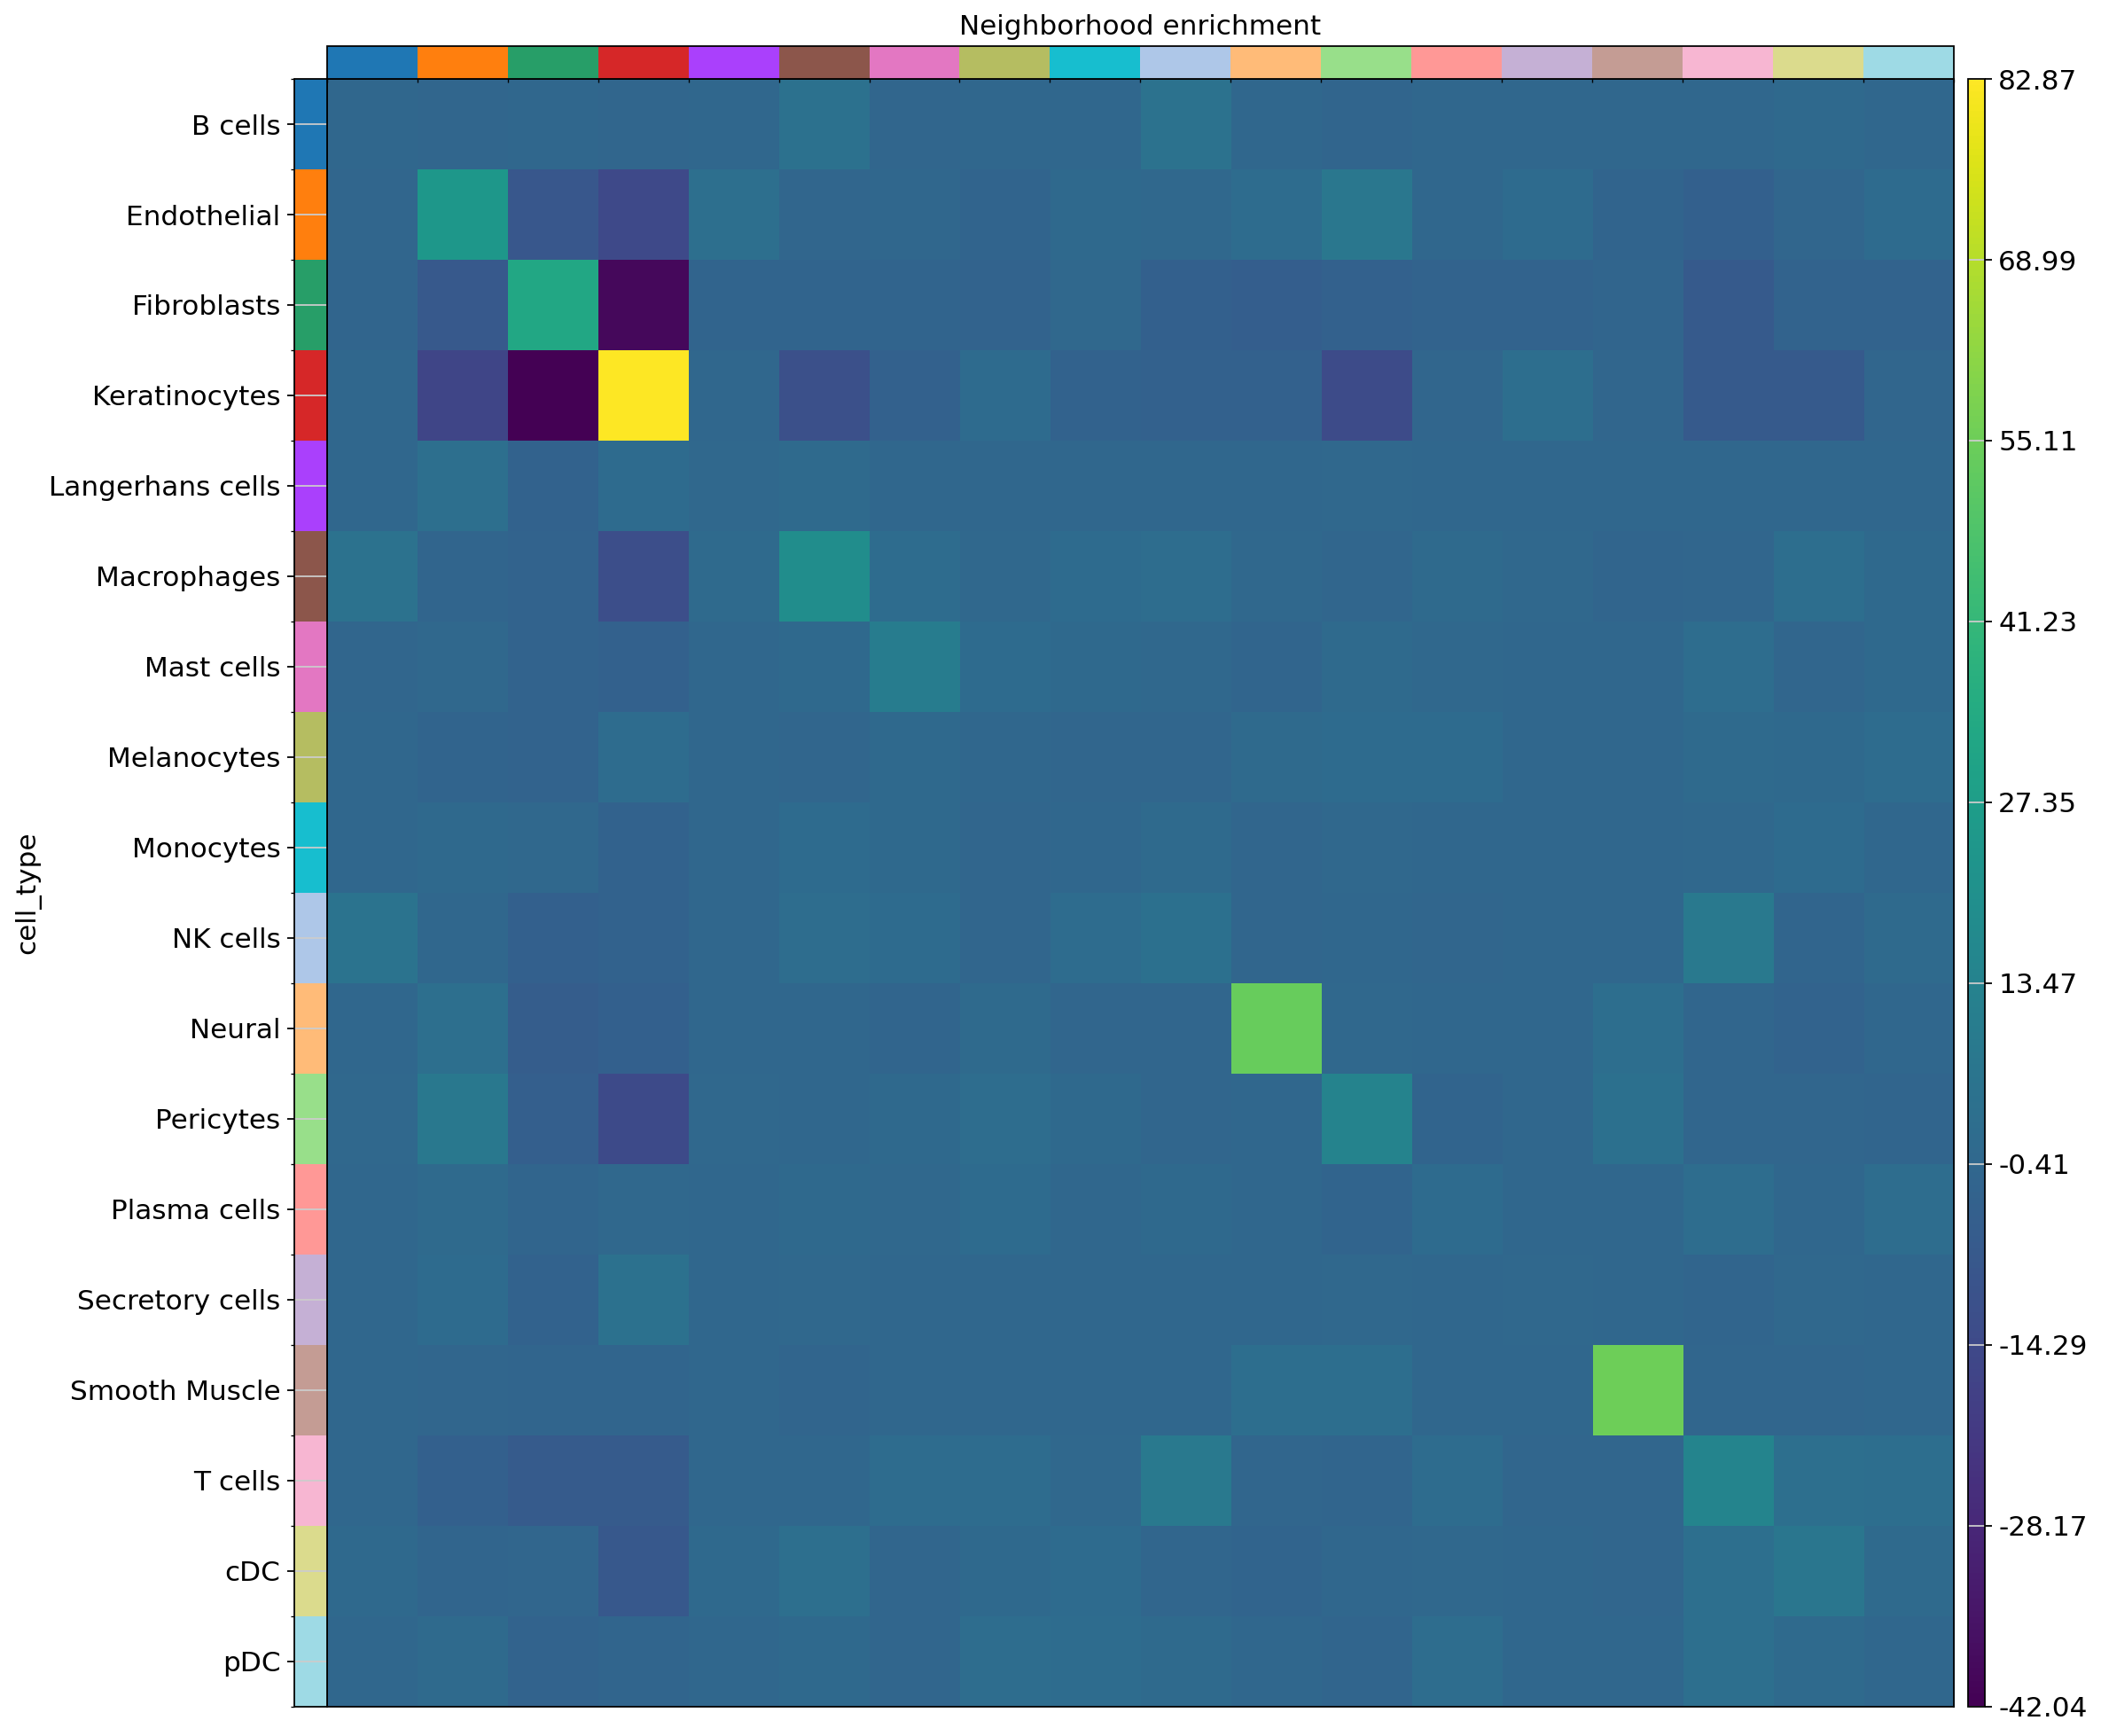

In [15]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="cell_type")
sq.pl.nhood_enrichment(adata, cluster_key="cell_type")

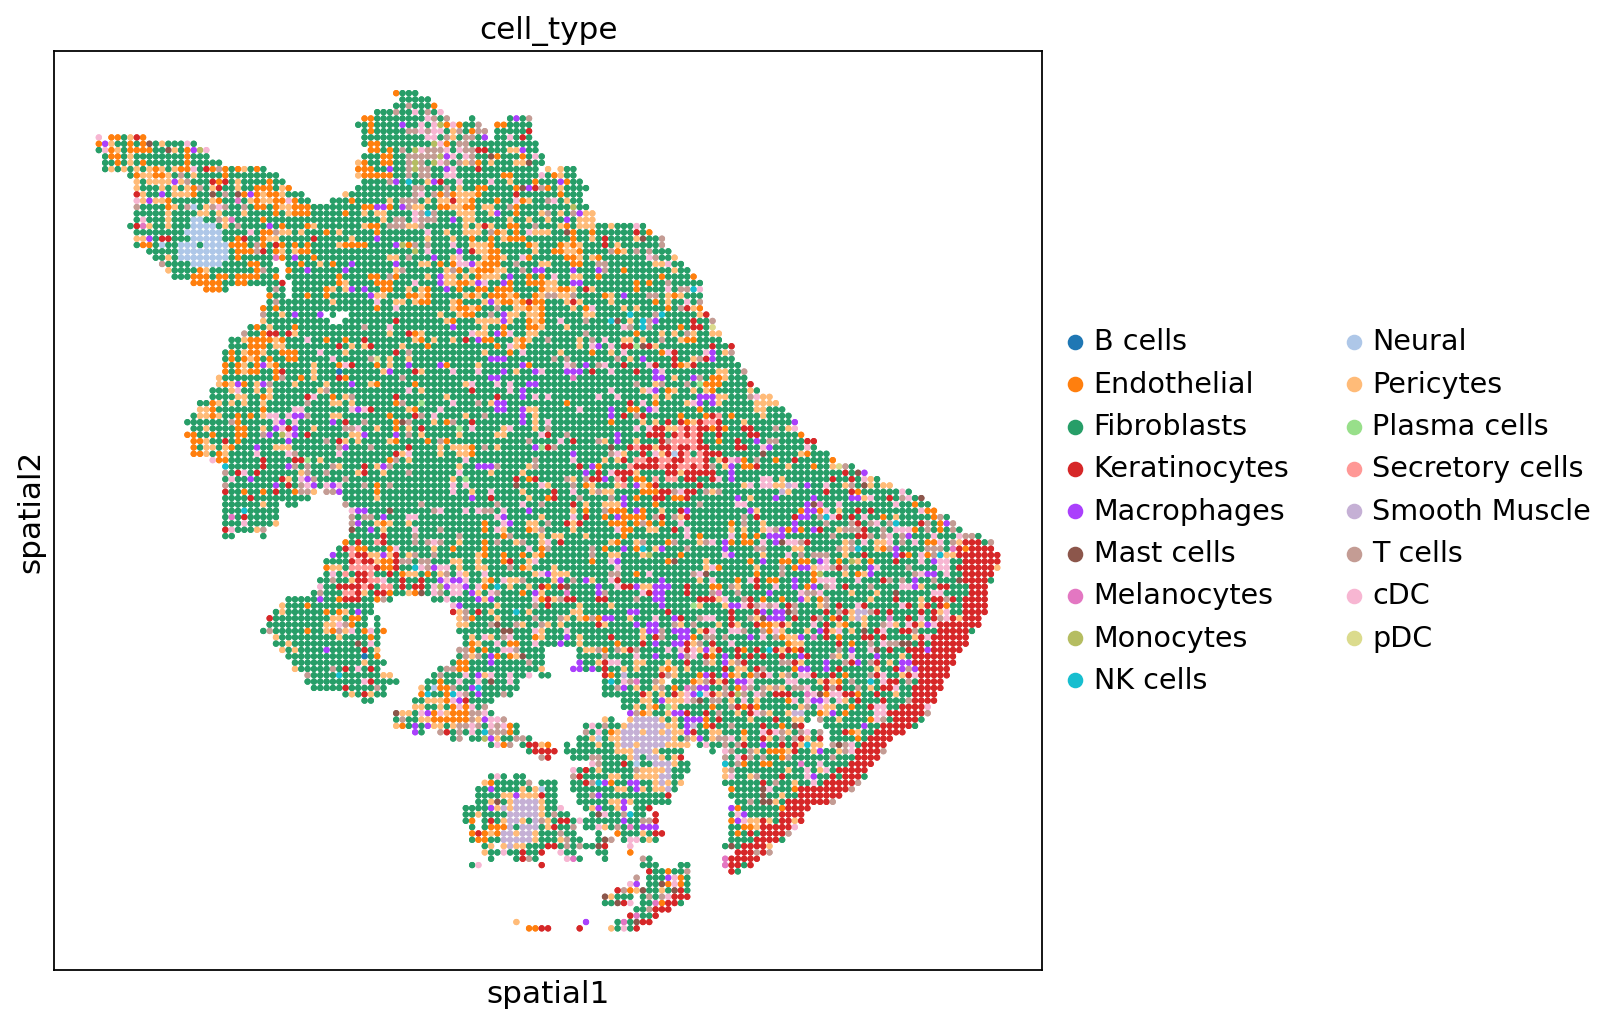

In [17]:
adata = sc.read_h5ad(f"{out_dir}/HL35.h5ad")
sq.pl.spatial_scatter(adata, color="cell_type", shape=None)

  0%|          | 0/1000 [00:00<?, ?/s]

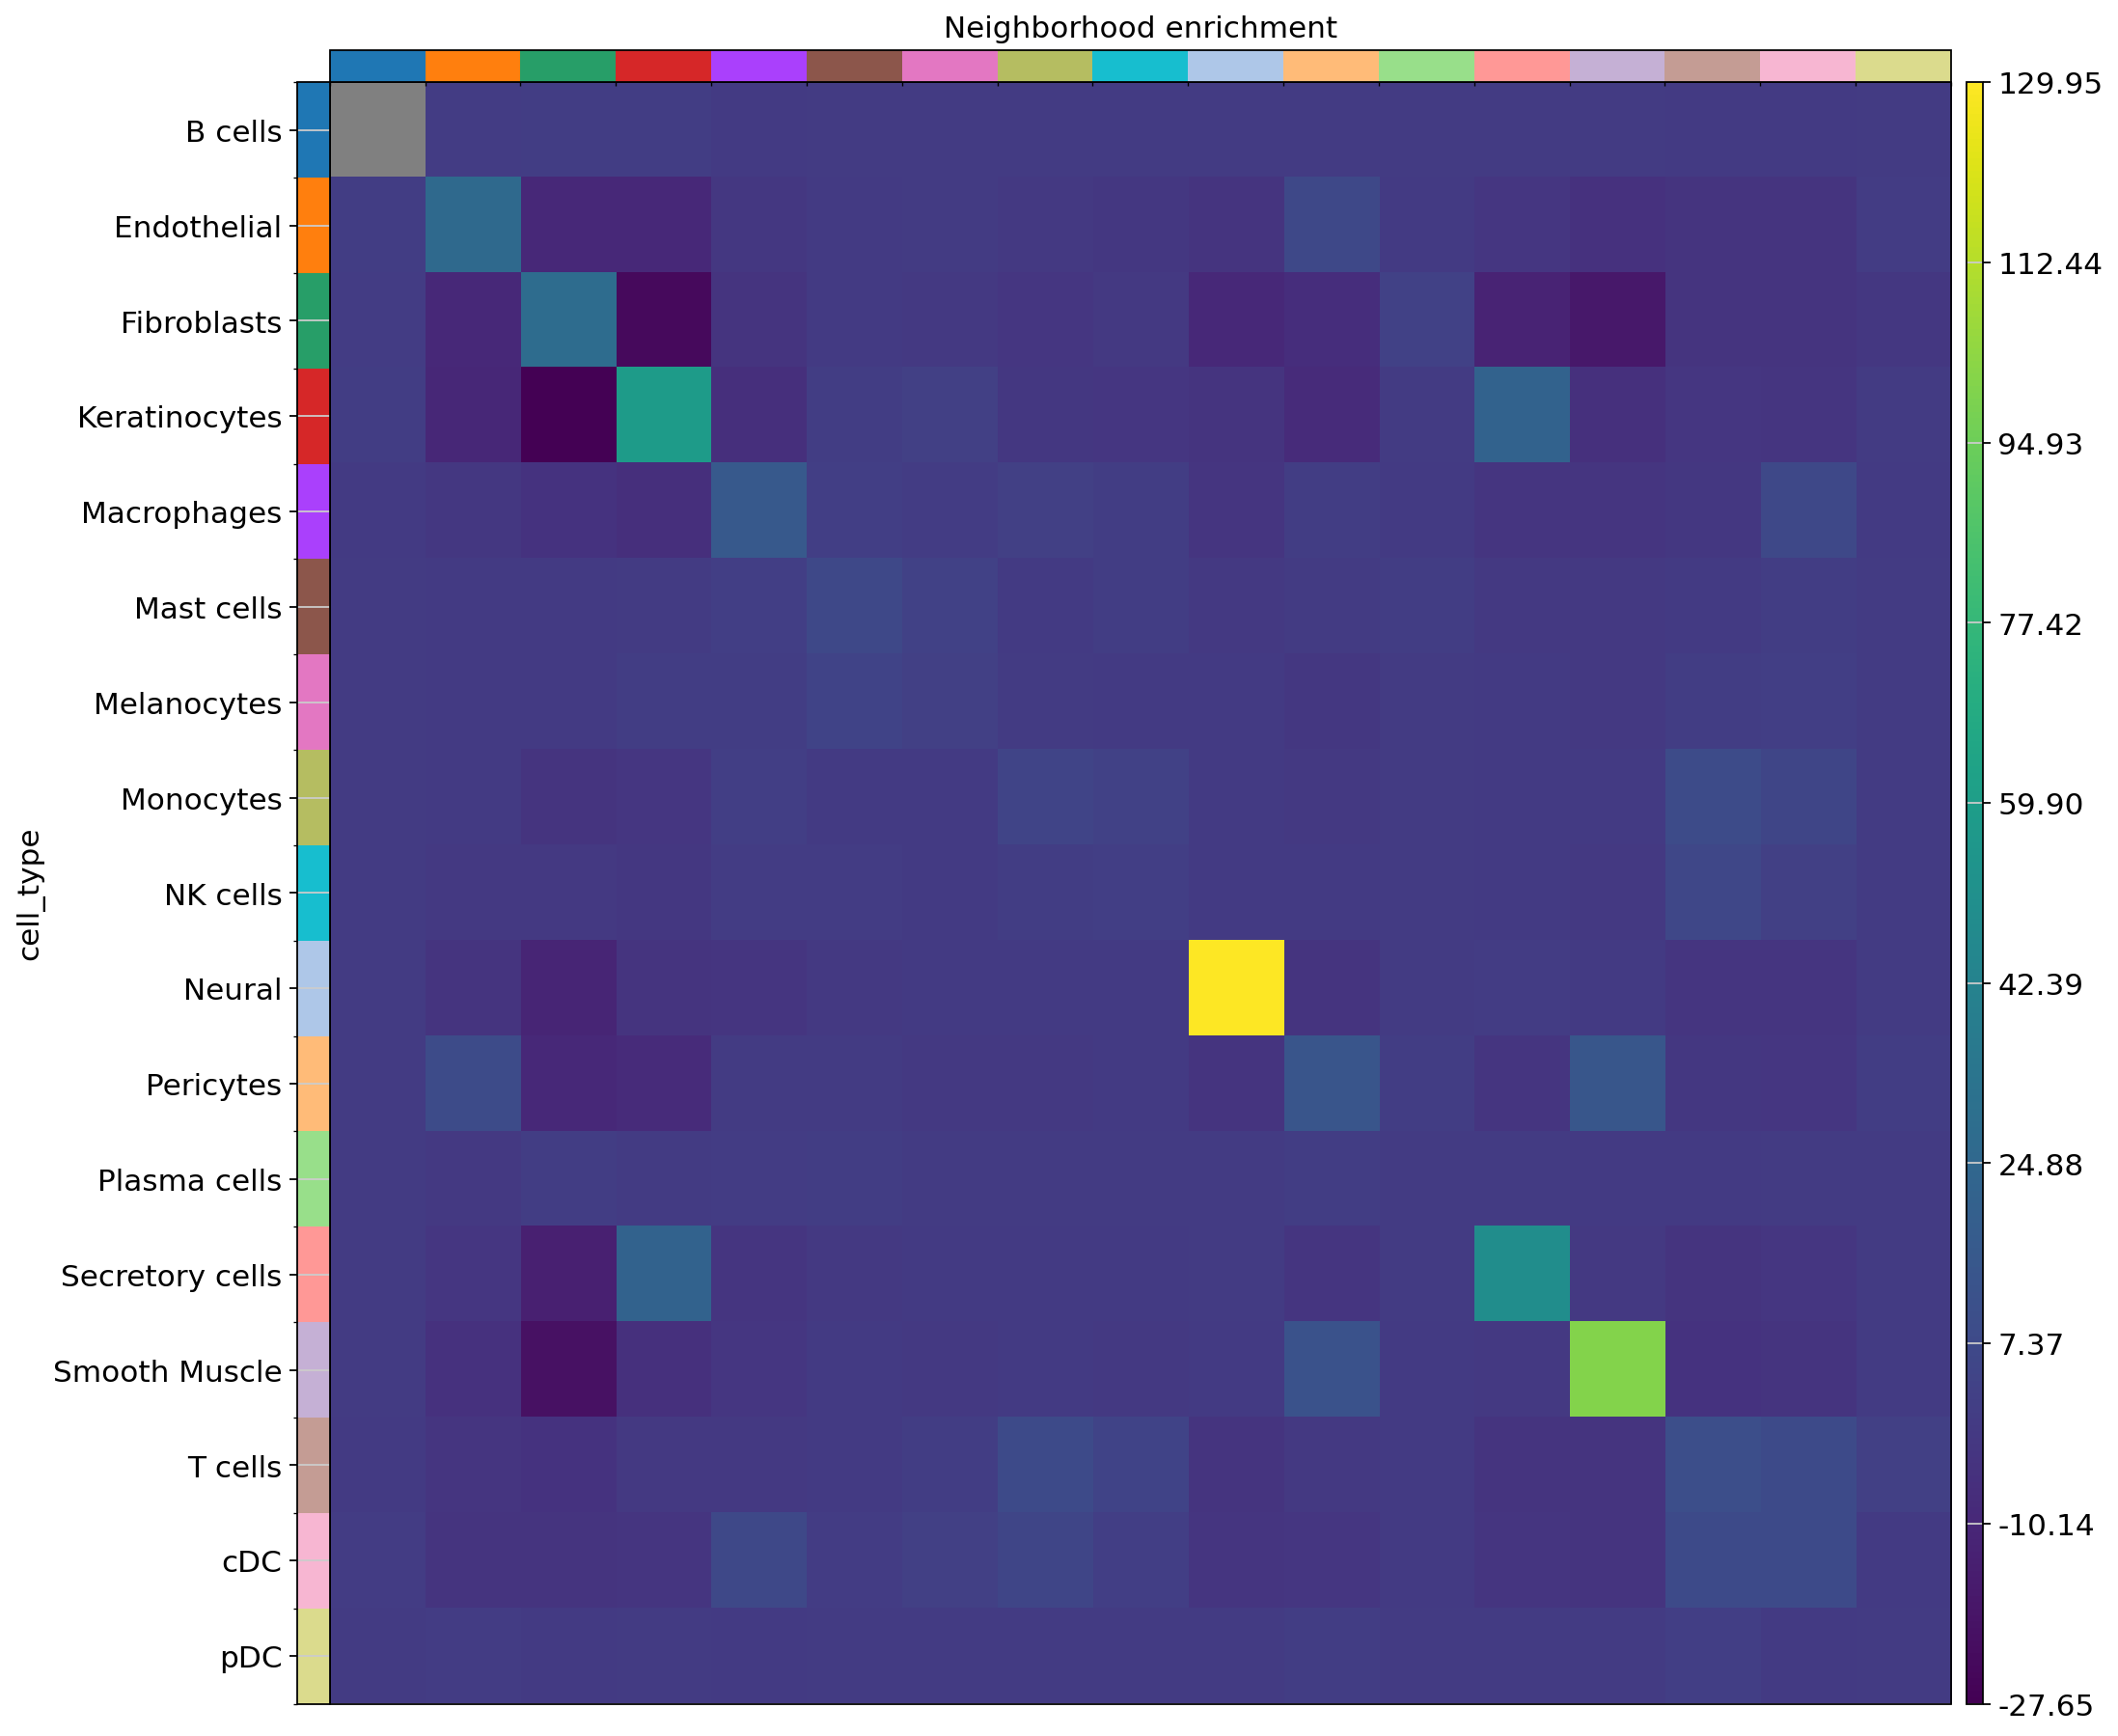

In [18]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="cell_type")
sq.pl.nhood_enrichment(adata, cluster_key="cell_type")